## LOADING LIBRARIES & DATA

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Ignore a specific warning type
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Catch warnings as exceptions
with warnings.catch_warnings():
    warnings.simplefilter("error")
    # Trigger code that generates a warning

In [7]:
df = pd.read_csv('https://zhang-datasets.s3.us-east-2.amazonaws.com/telcoChurn.csv')

Dataset shape: (7043, 21)

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract 

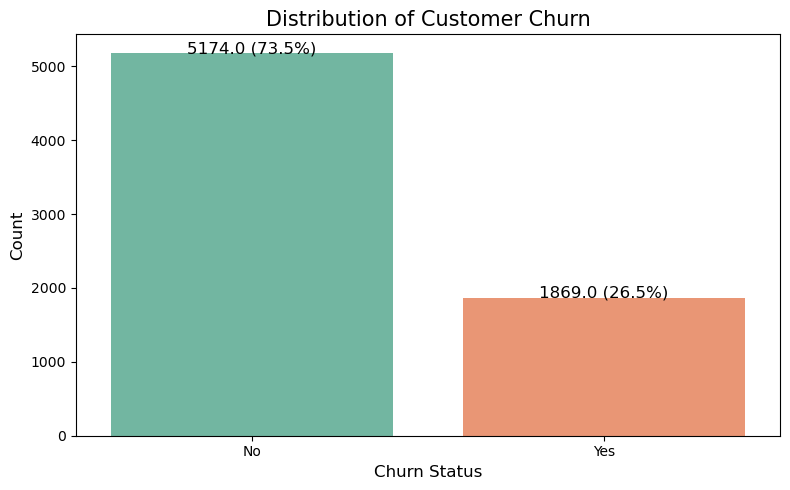


Columns in the dataset:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values for selected categorical columns:
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']


In [6]:
# Set some display options
pd.set_option('display.max_columns', None)
np.random.seed(42)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

# Convert TotalCharges to numeric (if it's not already)
if df['TotalCharges'].dtype == 'object':
    print("\nConverting TotalCharges to numeric...")
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    print(f"Number of missing values after conversion: {df['TotalCharges'].isnull().sum()}")
    
    # Fill missing values with median if any
    if df['TotalCharges'].isnull().sum() > 0:
        df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
        print("Filled missing values with median")

# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(df.describe())

# Check the distribution of the target variable (Churn)
print("\nChurn distribution:")
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
churn_df = pd.DataFrame({
    'Count': churn_counts,
    'Percentage (%)': churn_percentage
})
print(churn_df)

# Create a visualization of churn distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Churn', data=df, palette='Set2')

# Add count labels on top of the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 5,
            f'{height} ({churn_percentage.iloc[i]:.1f}%)',
            ha="center", fontsize=12)

plt.title('Distribution of Customer Churn', fontsize=15)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('churn_distribution.png')
plt.show()

# Display columns in the dataset
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Display unique values for categorical columns
print("\nUnique values for selected categorical columns:")
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns 
                   if col not in ['customerID']]
for col in categorical_cols[:5]:  # Show first 5 categorical columns
    print(f"{col}: {df[col].unique()}")

## EXPLORATORY DATA ANALYSIS

#### 1. ANALYZING CATEGORICAL VARIABLES


Analyzing 15 categorical variables...
Categorical variables: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


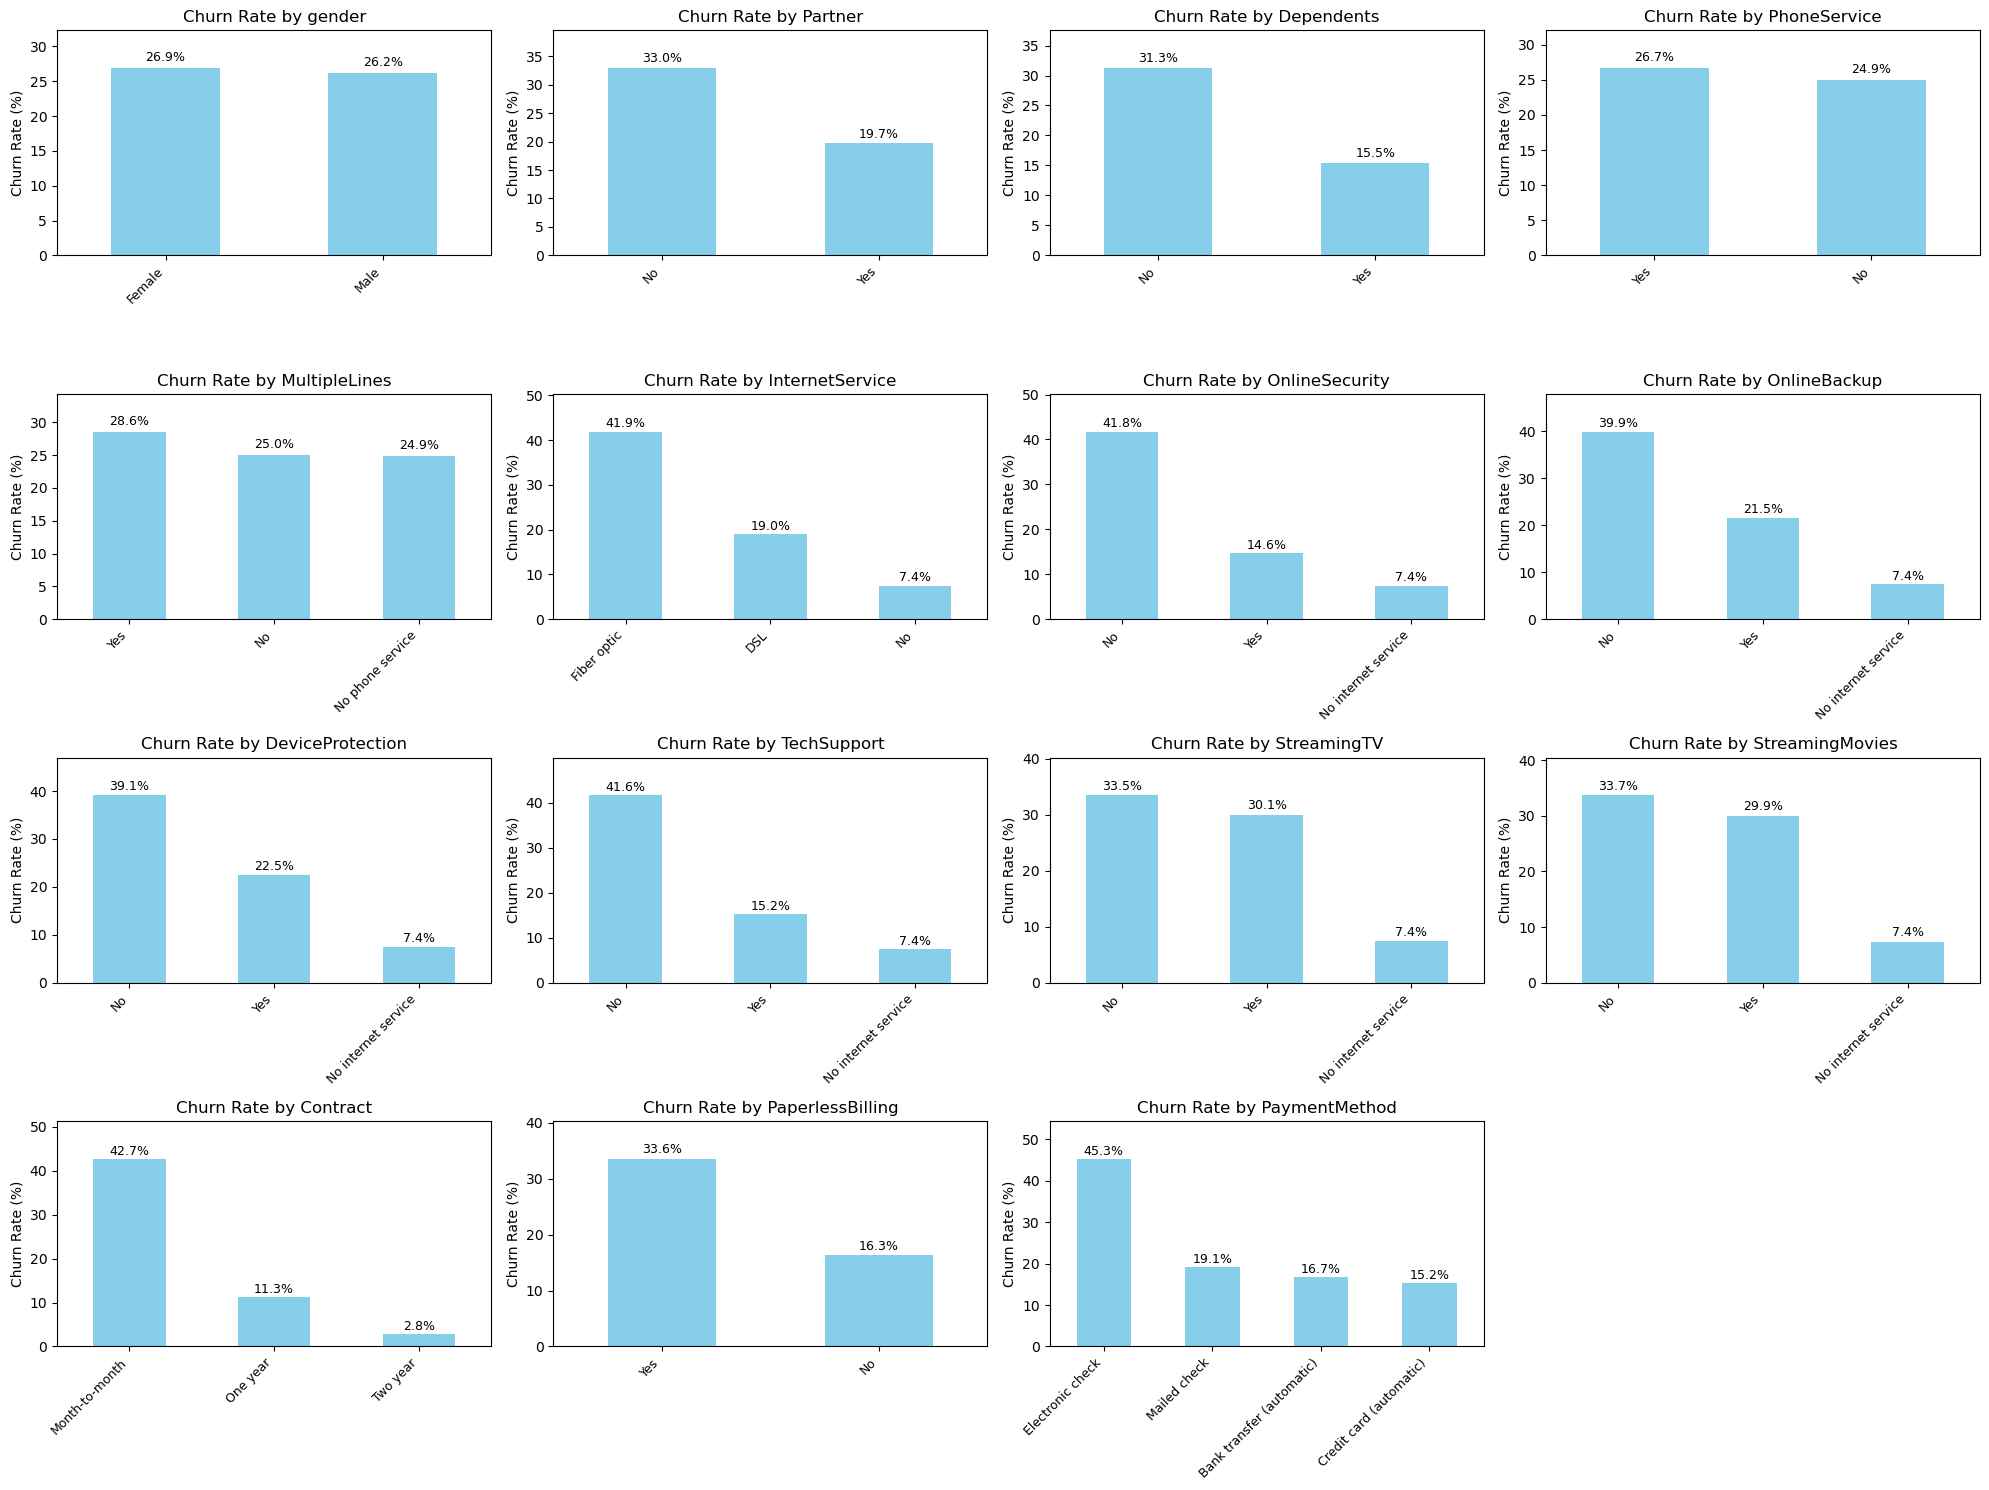


Top 5 categorical factors with highest churn rates:
  - PaymentMethod = Electronic check: 45.29% churn rate
  - Contract = Month-to-month: 42.71% churn rate
  - InternetService = Fiber optic: 41.89% churn rate
  - OnlineSecurity = No: 41.77% churn rate
  - TechSupport = No: 41.64% churn rate


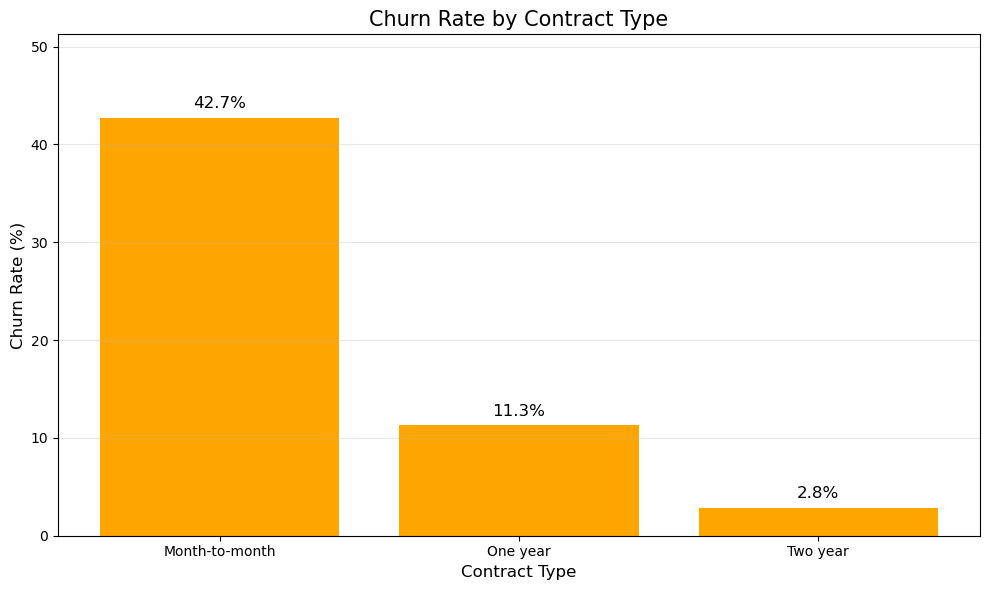


Churn rate by contract type:
  - Month-to-month: 42.71%
  - One year: 11.27%
  - Two year: 2.83%


In [27]:
# Identify categorical columns (excluding customerID and the target variable)
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns 
                   if col not in ['customerID', 'Churn']]

print(f"\nAnalyzing {len(categorical_cols)} categorical variables...")
print("Categorical variables:", categorical_cols)

# Create a figure to show churn rate by categorical variables
plt.figure(figsize=(20, 15))

# Dictionary to store the highest churn rates for each variable
highest_churn_rates = {}

# Loop through categorical columns to visualize churn rate
for i, col in enumerate(categorical_cols):
    # Create subplot (4 rows x 4 columns, for up to 16 variables)
    plt.subplot(4, 4, i+1)
    
    # Convert 'Churn' to 1/0 for calculation
    df['ChurnBinary'] = df['Churn'].map({'Yes': 1, 'No': 0})
    
    # Calculate churn rate for each category
    churn_rate = df.groupby(col)['ChurnBinary'].mean().sort_values(ascending=False) * 100
    
    # Plot the churn rate
    bars = churn_rate.plot(kind='bar', color='skyblue')
    
    # Add data labels
    for j, rate in enumerate(churn_rate):
        plt.text(j, rate + 1, f'{rate:.1f}%', ha='center', fontsize=9)
    
    plt.title(f'Churn Rate by {col}', fontsize=12)
    plt.ylabel('Churn Rate (%)', fontsize=10)
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.ylim(0, min(100, max(churn_rate) * 1.2))  # Add some space for the labels
    
    # Store the highest churn rate for this variable
    if not churn_rate.empty:
        highest_category = churn_rate.index[0]
        highest_rate = churn_rate.iloc[0]
        highest_churn_rates[f"{col} = {highest_category}"] = highest_rate

plt.tight_layout()
plt.savefig('churn_by_categorical.png')
plt.show()

# Print the top factors with highest churn rates
print("\nTop 5 categorical factors with highest churn rates:")
top_factors = sorted(highest_churn_rates.items(), key=lambda x: x[1], reverse=True)[:5]
for factor, rate in top_factors:
    print(f"  - {factor}: {rate:.2f}% churn rate")

# Remove the temporary ChurnBinary column
df.drop('ChurnBinary', axis=1, inplace=True)

# Analyze contract type specifically (a key factor in churn)
plt.figure(figsize=(10, 6))
contract_churn = df.groupby('Contract')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values(ascending=False)

bars = plt.bar(contract_churn.index, contract_churn.values, color='orange')

# Add data labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., 
             height + 1,
             f'{contract_churn.iloc[i]:.1f}%', 
             ha='center', fontsize=12)

plt.title('Churn Rate by Contract Type', fontsize=15)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.ylim(0, max(contract_churn) * 1.2)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('churn_by_contract.png')
plt.show()

print("\nChurn rate by contract type:")
for contract, rate in contract_churn.items():
    print(f"  - {contract}: {rate:.2f}%")

#### 2. ANALYZE NUMERICAL VARIABLES


Analyzing 4 numerical variables...
Numerical variables: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


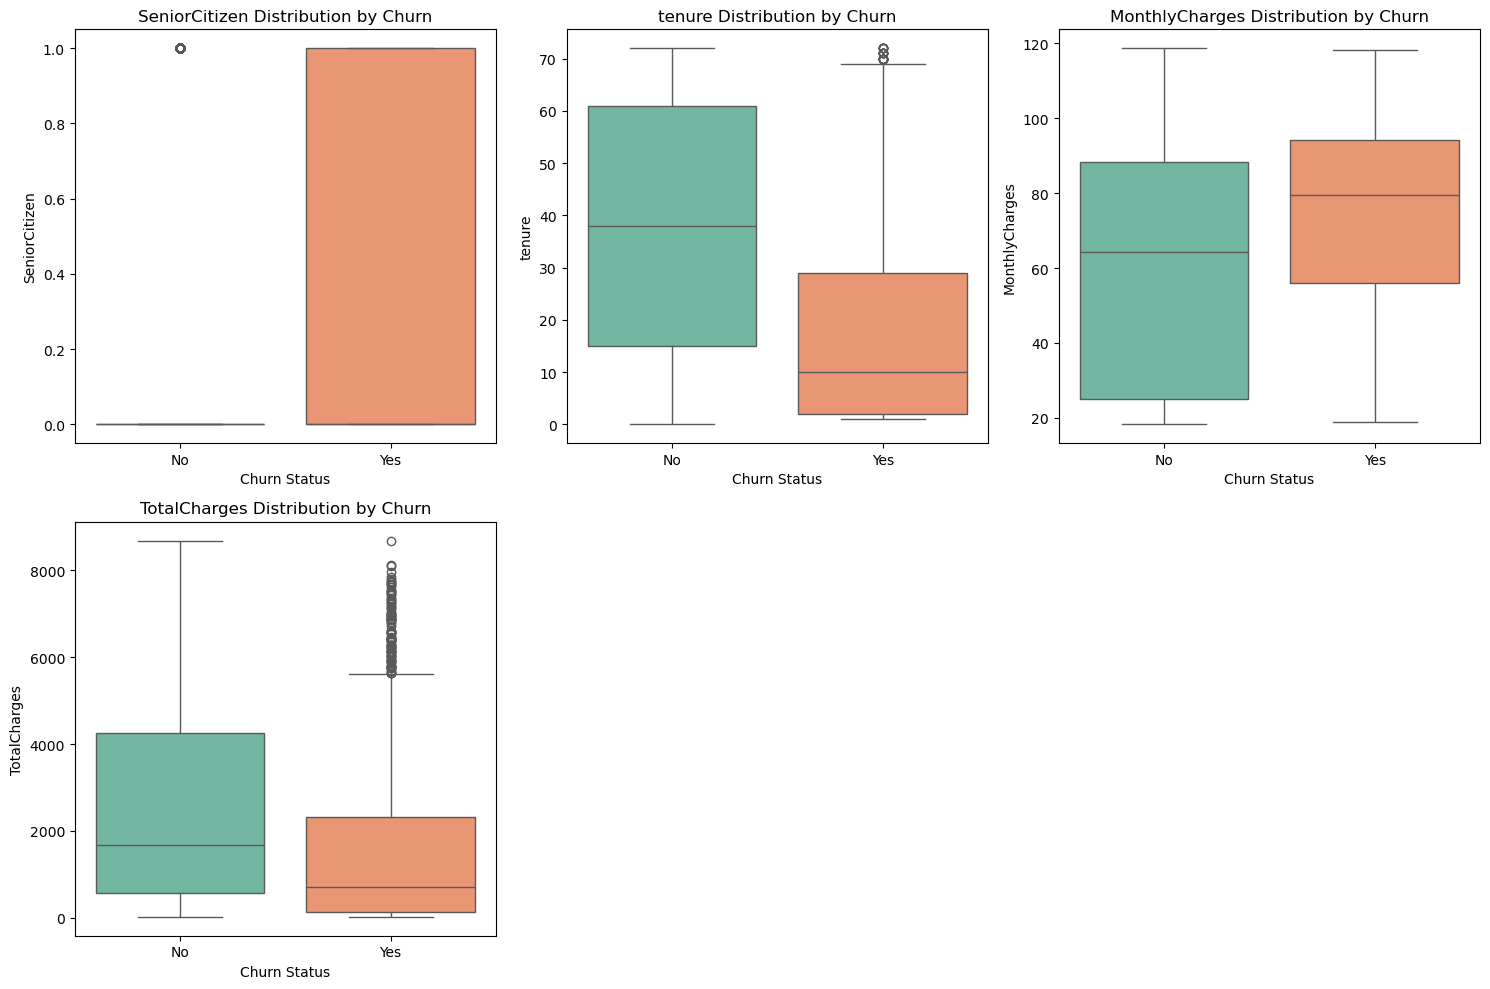


Summary statistics for numerical variables by churn:

Variable: SeniorCitizen
       mean  median   std
Churn                    
No     0.13     0.0  0.33
Yes    0.25     0.0  0.44

Variable: tenure
        mean  median    std
Churn                      
No     37.57    38.0  24.11
Yes    17.98    10.0  19.53

Variable: MonthlyCharges
        mean  median    std
Churn                      
No     61.27   64.43  31.09
Yes    74.44   79.65  24.67

Variable: TotalCharges
          mean   median      std
Churn                           
No     2552.88  1679.52  2327.59
Yes    1531.80   703.55  1890.82


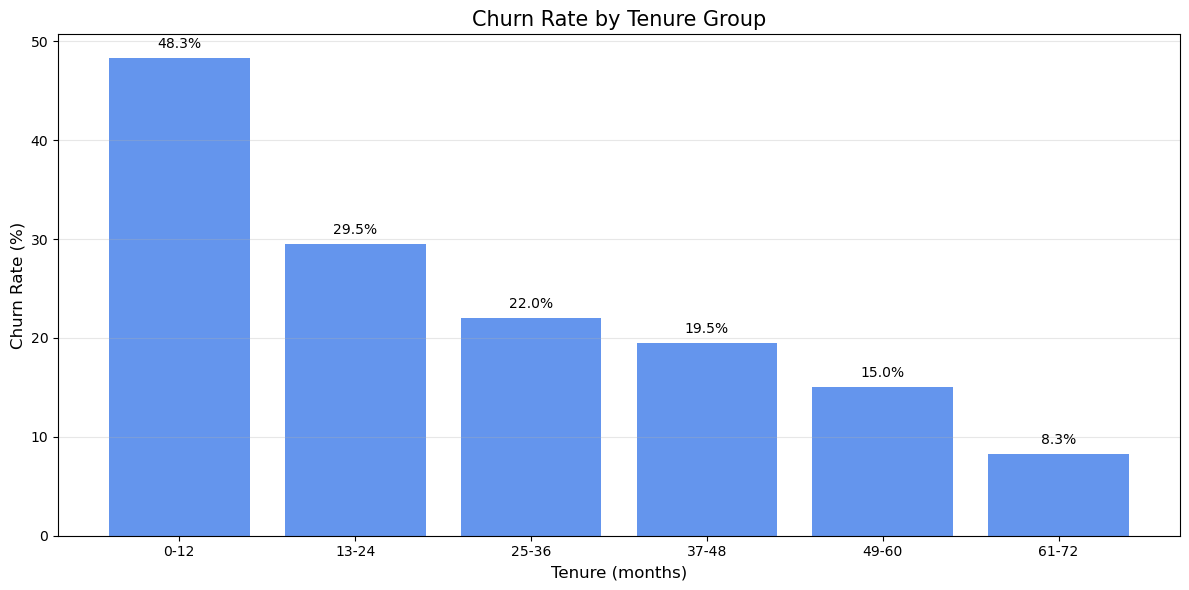


Churn rate by tenure group:
  tenure_group      Churn
0         0-12  48.284195
1        13-24  29.512894
2        25-36  22.031963
3        37-48  19.518717
4        49-60  15.000000
5        61-72   8.296164


In [29]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nAnalyzing {len(numerical_cols)} numerical variables...")
print("Numerical variables:", numerical_cols)

# Create a figure for numerical variables distribution by churn
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    
    # Compare the distribution of the variable between churned and non-churned customers
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    
    plt.title(f'{col} Distribution by Churn', fontsize=12)
    plt.xlabel('Churn Status', fontsize=10)
    plt.ylabel(col, fontsize=10)

plt.tight_layout()
plt.savefig('numerical_distribution_by_churn.png')
plt.show()

# Print summary statistics by churn
print("\nSummary statistics for numerical variables by churn:")
for col in numerical_cols:
    print(f"\nVariable: {col}")
    stats_by_churn = df.groupby('Churn')[col].agg(['mean', 'median', 'std']).round(2)
    print(stats_by_churn)

# Create a visualization specifically for tenure
plt.figure(figsize=(12, 6))

# Create tenure groups for better visualization
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, right=False, labels=labels)

# Calculate churn rate by tenure group
churn_by_tenure = df.groupby('tenure_group')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()

plt.bar(churn_by_tenure['tenure_group'].astype(str), churn_by_tenure['Churn'], color='cornflowerblue')
plt.title('Churn Rate by Tenure Group', fontsize=15)
plt.xlabel('Tenure (months)', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

# Add data labels
for i, v in enumerate(churn_by_tenure['Churn']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('churn_by_tenure.png')
plt.show()

print("\nChurn rate by tenure group:")
print(churn_by_tenure.sort_values('Churn', ascending=False))

#### 3. ANALYZING SERVICES AND THEIR IMPACT ON CUSTOMER CHURN


Analyzing the impact of services on churn...
Service columns being analyzed: ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


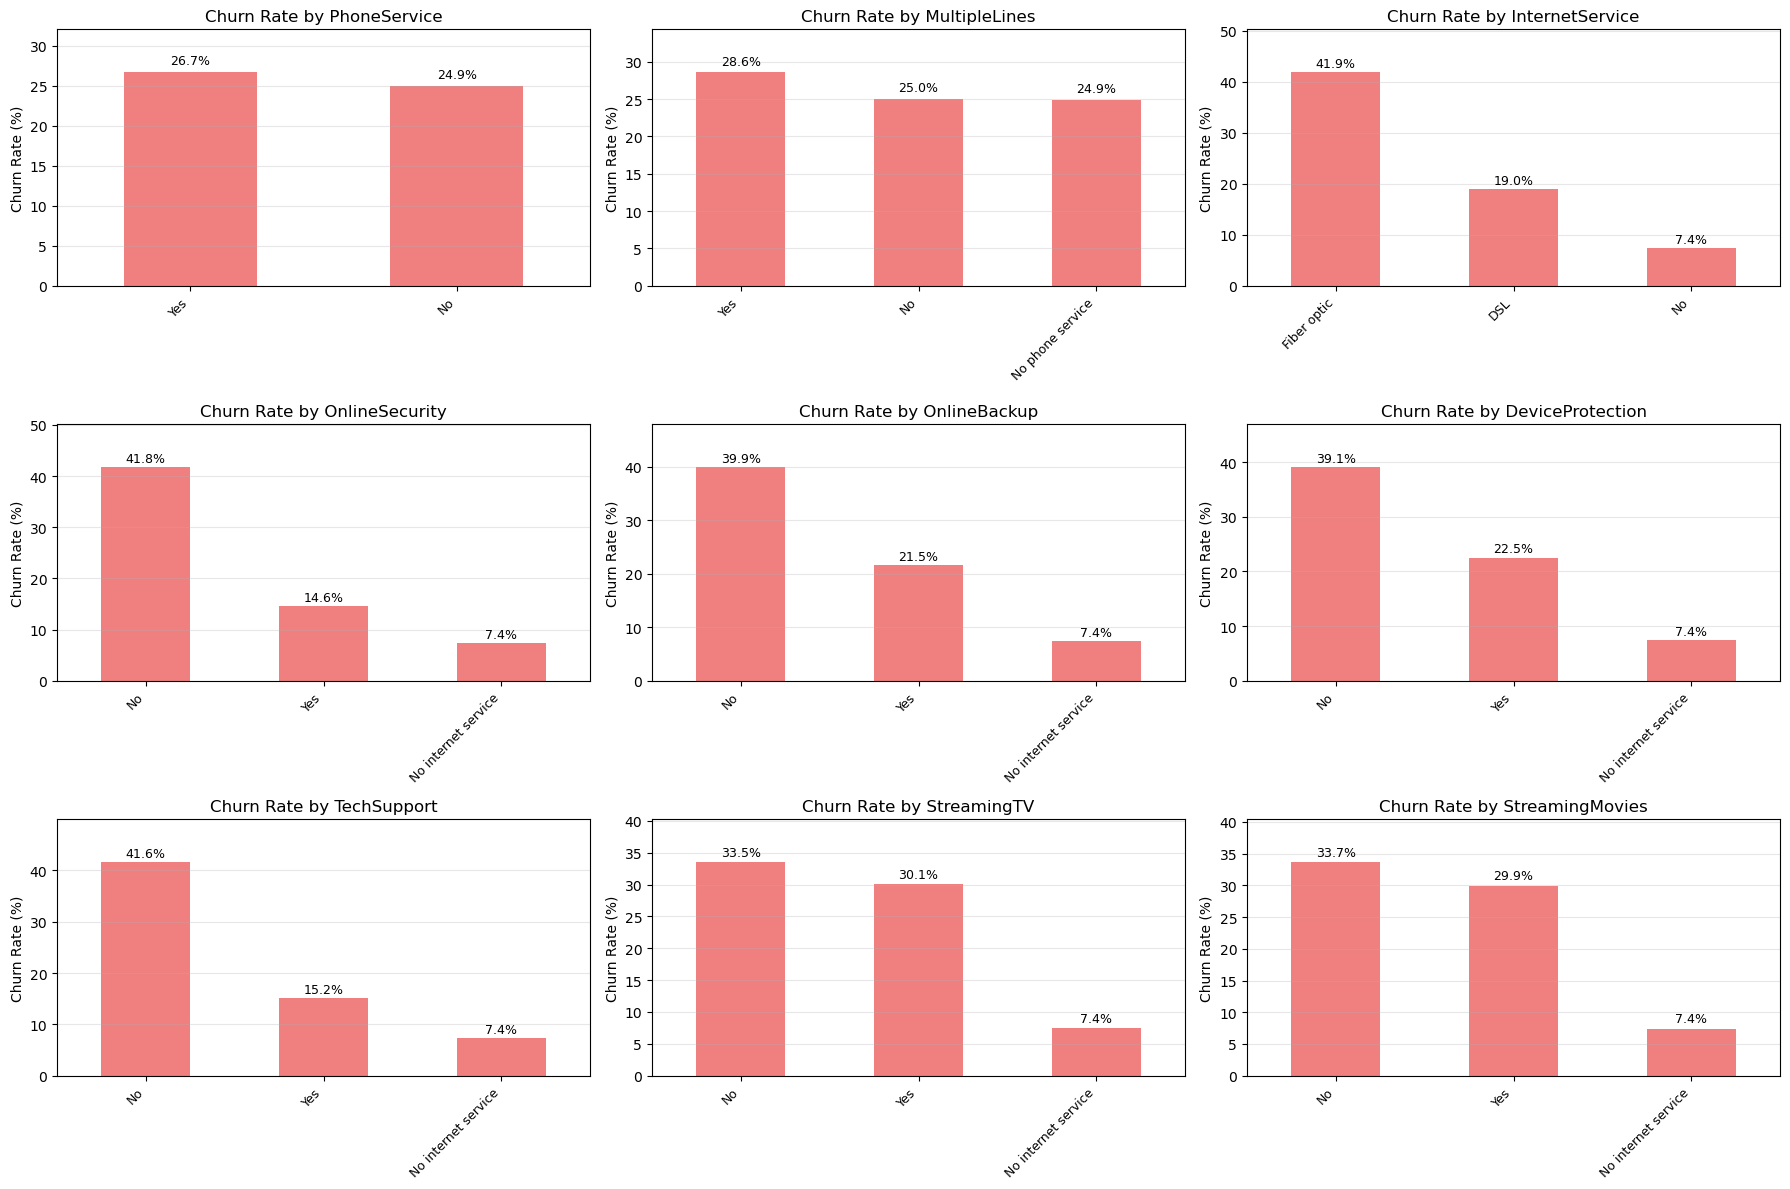


Impact of protective services on churn rate:
  - Customers without OnlineSecurity have a 27.16% higher churn rate
    (41.77% without vs 14.61% with)
  - Customers without OnlineBackup have a 18.40% higher churn rate
    (39.93% without vs 21.53% with)
  - Customers without DeviceProtection have a 16.63% higher churn rate
    (39.13% without vs 22.50% with)
  - Customers without TechSupport have a 26.47% higher churn rate
    (41.64% without vs 15.17% with)


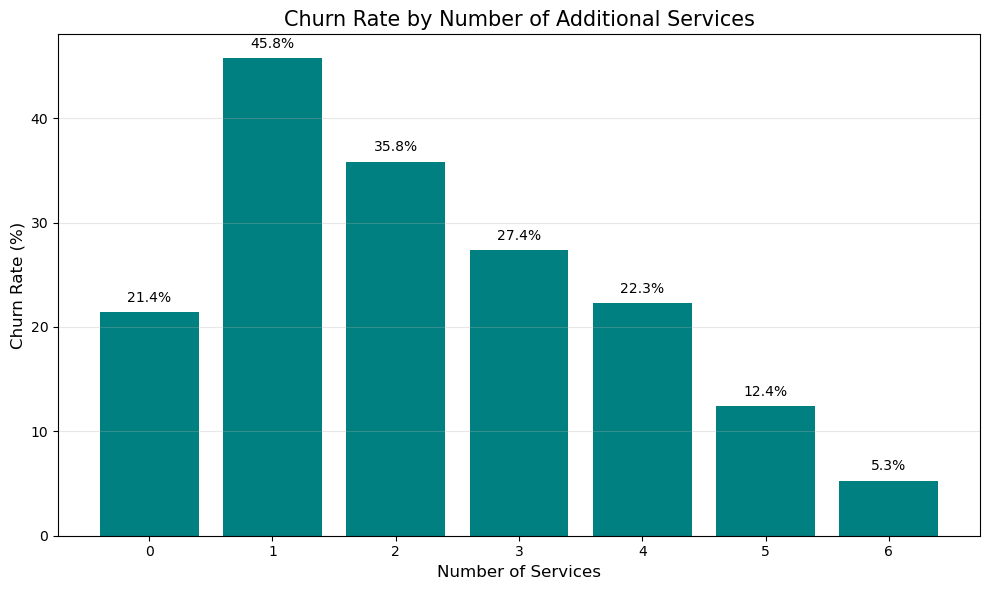


Churn rate by number of additional services:
   total_services      Churn
0               0  21.406039
1               1  45.755694
2               2  35.818006
3               3  27.370304
4               4  22.300469
5               5  12.434326
6               6   5.281690


In [31]:
# Analyze the impact of different services on churn
print("\nAnalyzing the impact of services on churn...")

# List of service-related columns
service_cols = [col for col in df.columns if col in [
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]]

print(f"Service columns being analyzed: {service_cols}")

# Create a figure to show churn rate by services
plt.figure(figsize=(18, 12))

for i, col in enumerate(service_cols):
    plt.subplot(3, 3, i+1)
    
    # Calculate churn rate for each service option
    service_churn = df.groupby(col)['Churn'].apply(
        lambda x: (x == 'Yes').mean() * 100
    ).sort_values(ascending=False)
    
    # Plot the churn rate
    bars = service_churn.plot(kind='bar', color='lightcoral')
    
    # Add data labels
    for j, rate in enumerate(service_churn):
        plt.text(j, rate + 1, f'{rate:.1f}%', ha='center', fontsize=9)
    
    plt.title(f'Churn Rate by {col}', fontsize=12)
    plt.ylabel('Churn Rate (%)', fontsize=10)
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.ylim(0, min(100, max(service_churn) * 1.2))  # Add some space for the labels
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('churn_by_services.png')
plt.show()

# Calculate the impact of protective services on churn
print("\nImpact of protective services on churn rate:")
protective_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

for service in protective_services:
    if service in df.columns:
        # Internet customers only
        internet_customers = df[df['InternetService'] != 'No']
        
        # Customers with the service
        with_service = internet_customers[internet_customers[service] == 'Yes']
        service_yes_rate = (with_service['Churn'] == 'Yes').mean() * 100
        
        # Customers without the service
        without_service = internet_customers[internet_customers[service] == 'No']
        service_no_rate = (without_service['Churn'] == 'Yes').mean() * 100
        
        # Calculate the difference
        churn_difference = service_no_rate - service_yes_rate
        
        if churn_difference > 0:
            print(f"  - Customers without {service} have a {churn_difference:.2f}% higher churn rate")
            print(f"    ({service_no_rate:.2f}% without vs {service_yes_rate:.2f}% with)")
        else:
            print(f"  - {service} doesn't appear to reduce churn rate")

# Count services per customer and analyze impact
df['total_services'] = 0
for service in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    if service in df.columns:
        df['total_services'] += (df[service] == 'Yes').astype(int)

# Group by number of services and calculate churn rate
plt.figure(figsize=(10, 6))
services_churn = df.groupby('total_services')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()

plt.bar(services_churn['total_services'], services_churn['Churn'], color='teal')
plt.title('Churn Rate by Number of Additional Services', fontsize=15)
plt.xlabel('Number of Services', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

# Add data labels
for i, row in services_churn.iterrows():
    plt.text(row['total_services'], row['Churn'] + 1, 
             f'{row["Churn"]:.1f}%', 
             ha='center', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('churn_by_service_count.png')
plt.show()

print("\nChurn rate by number of additional services:")
print(services_churn)

## LOGISTIC REGRESSION : MODEL BASED INFERENCE

In [55]:
## Step 1: Make a copy of the data
churn =  df.copy()

# Step 2: Drop customerID (it's just an identifier)
churn.drop('customerID', axis=1, inplace=True)

# Step 3: Convert TotalCharges to numeric (some rows may have spaces or empty strings)
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

# Step 4: Drop rows with missing TotalCharges (if any)
churn.dropna(inplace=True)

# Step 5: Convert target variable Churn to numeric
churn['Churn'] = churn['Churn'].map({'Yes': 1, 'No': 0})

# Step 6: Drop nested parent variables to avoid multicollinearity
churn.drop(['PhoneService', 'InternetService'], axis=1, inplace=True)

# Step 7: One-hot encode categorical variables (drop_first avoids dummy variable trap)
churn_encoded = pd.get_dummies(churn, drop_first=True)

# Final result: churn_encoded is ready for modeling
print("Preprocessing complete. Shape of final dataset:", churn_encoded.shape)
churn_encoded.head()

Preprocessing complete. Shape of final dataset: (6681, 34)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,total_services,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,1,29.85,29.85,0,1,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
1,0,34,56.95,1889.50,0,2,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False
2,0,2,53.85,108.15,1,2,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
3,0,45,42.30,1840.75,0,3,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False


In [57]:
# Use Logistic Regression for Interpretation

import statsmodels.api as sm

# Split features and target
X = churn_encoded.drop('Churn', axis=1)
y = churn_encoded['Churn']

# Convert all boolean columns to integers (True/False → 1/0)
X = X.astype(float)
y = y.astype(float)


# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
logit_model = sm.Logit(y, X).fit()

# Summary of the logistic regression model
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.427993
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 6681
Model:                          Logit   Df Residuals:                     6653
Method:                           MLE   Df Model:                           27
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:                  0.2769
Time:                        23:32:12   Log-Likelihood:                -2859.4
converged:                       True   LL-Null:                       -3954.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.7859     

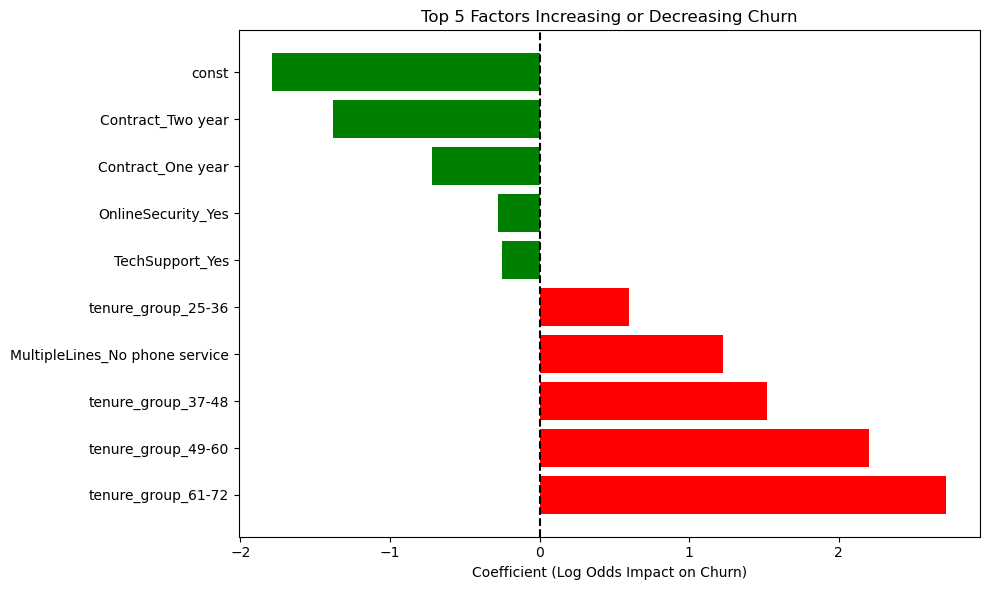

In [61]:
# Creating a DataFrame from the logistic regression summary
logit_summary = logit_model.summary2().tables[1]
logit_sorted = logit_summary.sort_values('Coef.', ascending=False)

# Top 5 increasing churn
top_increasing = logit_sorted.head(5)

# Top 5 decreasing churn
top_decreasing = logit_sorted.tail(5)

import matplotlib.pyplot as plt

# Combine both
top_features = pd.concat([top_increasing, top_decreasing])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features['Coef.'], color=['red' if c > 0 else 'green' for c in top_features['Coef.']])
plt.xlabel('Coefficient (Log Odds Impact on Churn)')
plt.title('Top 5 Factors Increasing or Decreasing Churn')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()



## DATA PREPROCESSING FOR MODELING

In [33]:
# Import necessary libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

print("\nPreprocessing data for modeling...")

# Create a copy of the dataframe for preprocessing
df_model = df.copy()

# Convert target variable to binary
df_model['Churn_Binary'] = df_model['Churn'].map({'Yes': 1, 'No': 0})
print(f"Converted 'Churn' to binary: {df_model['Churn_Binary'].value_counts()}")

# Create X and y for modeling
X = df_model.drop(['customerID', 'Churn', 'Churn_Binary', 'tenure_group', 'total_services'], axis=1, errors='ignore')
y = df_model['Churn_Binary']

# Identify numerical and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Numerical features ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set churn rate: {y_train.mean() * 100:.2f}%")
print(f"Testing set churn rate: {y_test.mean() * 100:.2f}%")

# Create preprocessing steps for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Fit the preprocessor to the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed testing data shape: {X_test_processed.shape}")
print("Data preprocessing completed successfully!")


Preprocessing data for modeling...
Converted 'Churn' to binary: Churn_Binary
0    5174
1    1869
Name: count, dtype: int64
Feature matrix shape: (7043, 19)
Target vector shape: (7043,)
Numerical features (4): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features (15): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Training set size: 5634 samples
Testing set size: 1409 samples
Training set churn rate: 26.54%
Testing set churn rate: 26.54%
Processed training data shape: (5634, 30)
Processed testing data shape: (1409, 30)
Data preprocessing completed successfully!


## MODEL BUILDING & EVALUATION


Training and evaluating machine learning models...

Training Logistic Regression...
  Accuracy: 0.8055
  Precision: 0.6572
  Recall: 0.5588
  F1 Score: 0.6040
  ROC AUC: 0.8420
  Training Time: 0.26 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



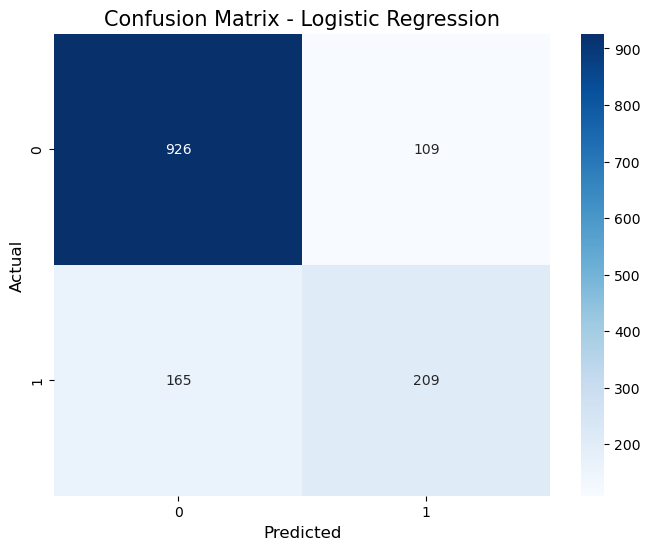


Training Decision Tree...
  Accuracy: 0.7410
  Precision: 0.5125
  Recall: 0.4920
  F1 Score: 0.5020
  ROC AUC: 0.6610
  Training Time: 0.26 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1035
           1       0.51      0.49      0.50       374

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



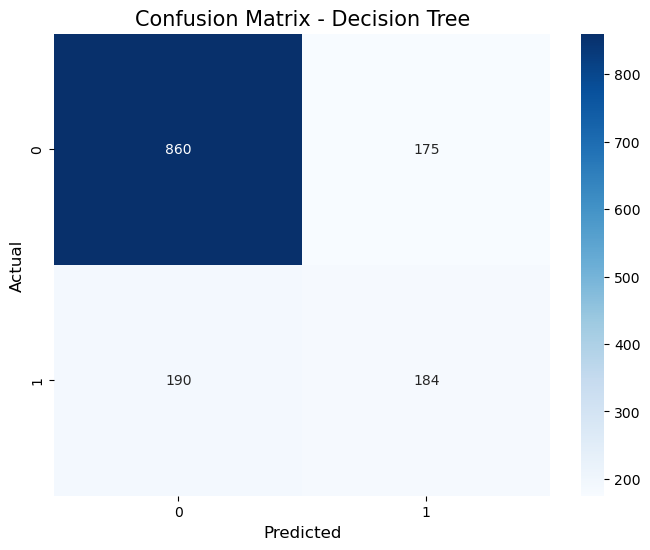


Training Random Forest...
  Accuracy: 0.7857
  Precision: 0.6216
  Recall: 0.4920
  F1 Score: 0.5493
  ROC AUC: 0.8246
  Training Time: 1.78 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



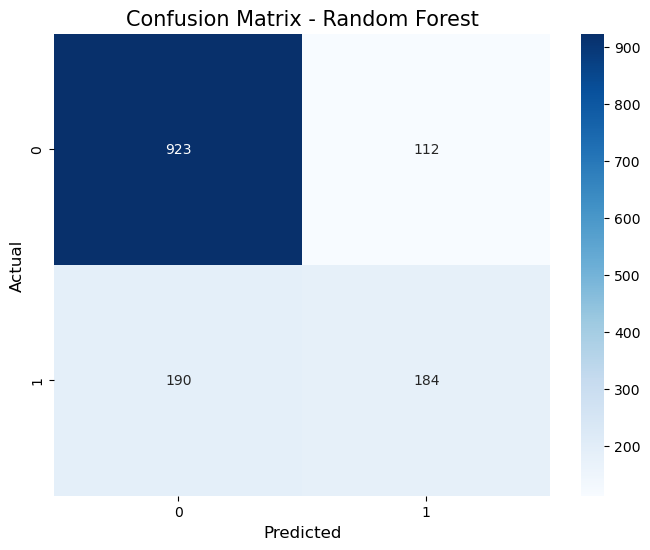


Training Gradient Boosting...
  Accuracy: 0.7984
  Precision: 0.6531
  Recall: 0.5134
  F1 Score: 0.5749
  ROC AUC: 0.8421
  Training Time: 2.40 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



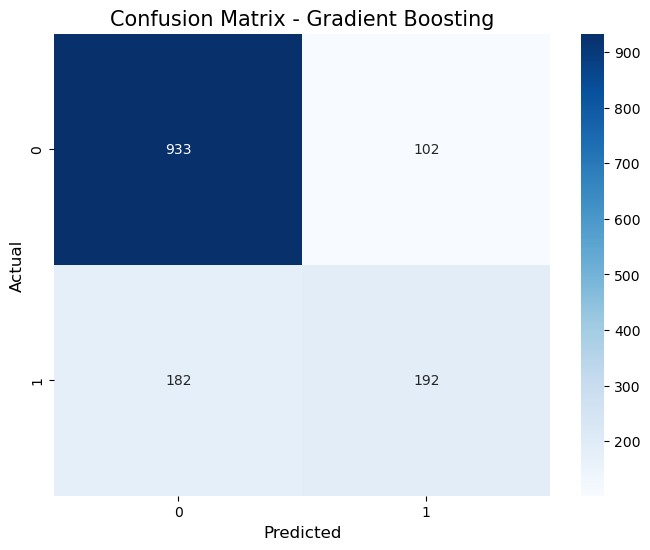


Best model based on ROC AUC: Gradient Boosting


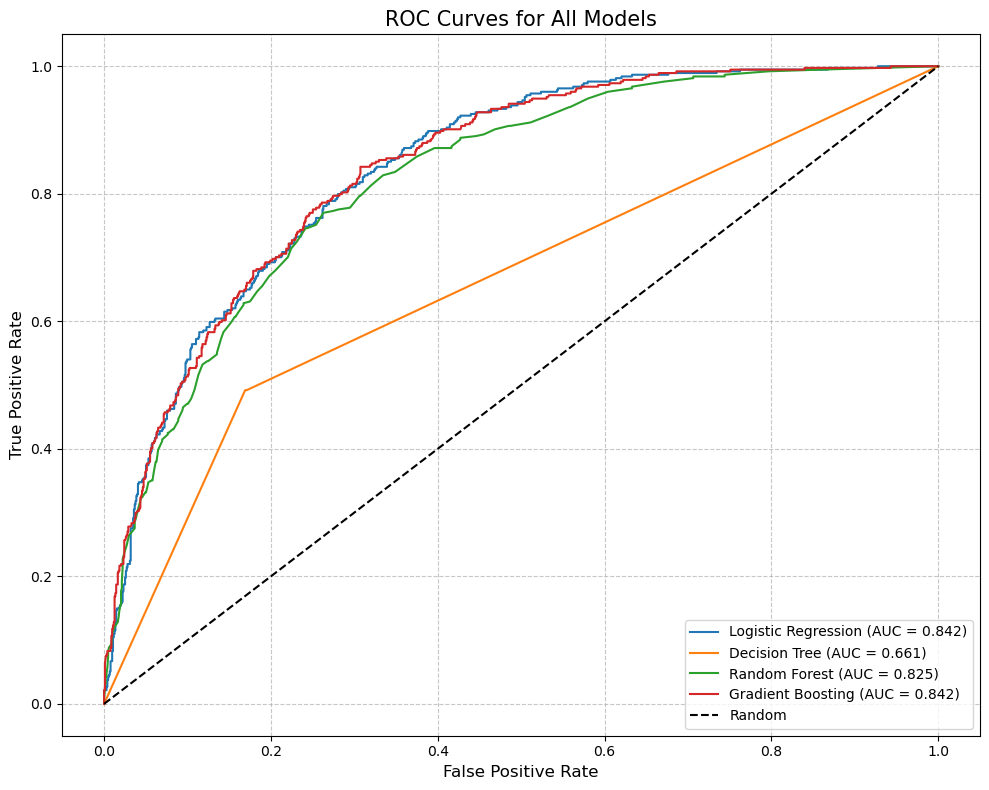

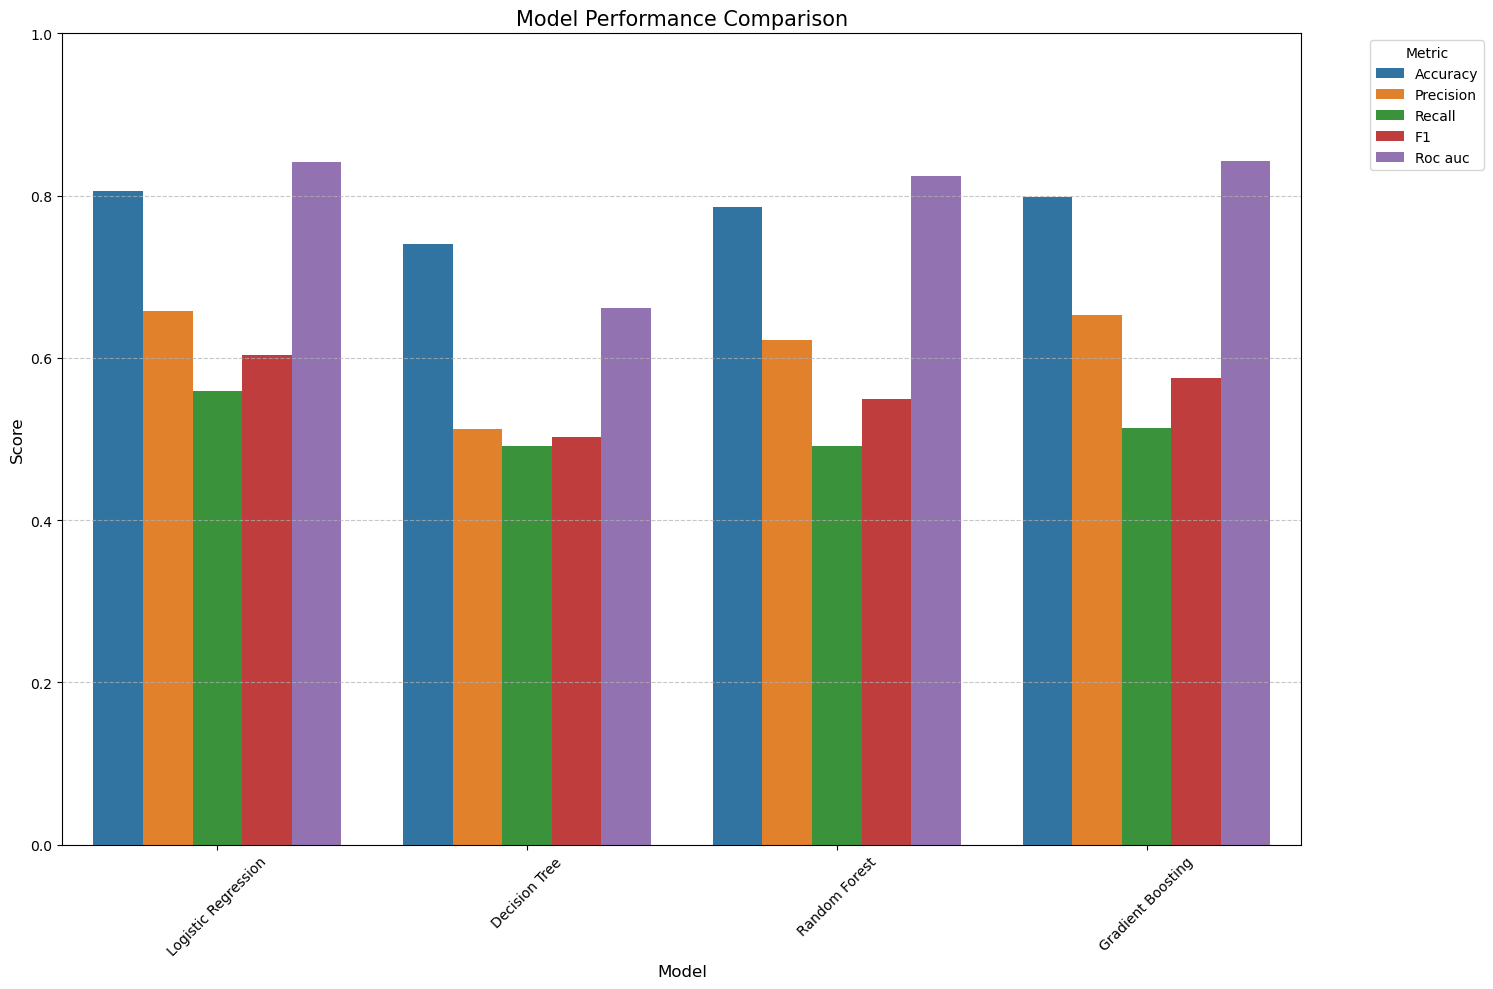

In [35]:
# Import necessary libraries for machine learning
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, classification_report,
                           roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time

print("\nTraining and evaluating machine learning models...")

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()
    
    # Create and train pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Calculate training time
    training_time = time.time() - start_time
    
    # Store results
    results[name] = {
        'pipeline': pipeline,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'training_time': training_time,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Print results
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Training Time: {training_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}', fontsize=15)
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_")}.png')
    plt.show()

# Find the best model based on ROC AUC
best_model_name = max(results.items(), key=lambda x: x[1]['roc_auc'])[0]
print(f"\nBest model based on ROC AUC: {best_model_name}")

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for All Models', fontsize=15)
plt.legend(loc='lower right')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('roc_curves.png')
plt.show()

# Compare model performance metrics
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
metrics_data = []

for name in results.keys():
    for metric in metrics:
        metrics_data.append({
            'Model': name,
            'Metric': metric.capitalize().replace('_', ' '),
            'Value': results[name][metric]
        })

metrics_df = pd.DataFrame(metrics_data)

# Plot metrics comparison
plt.figure(figsize=(15, 10))
sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_df)
plt.title('Model Performance Comparison', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

## FEATURE IMPORTANCE AND RETENTION PLAN


Analyzing feature importance for Gradient Boosting...


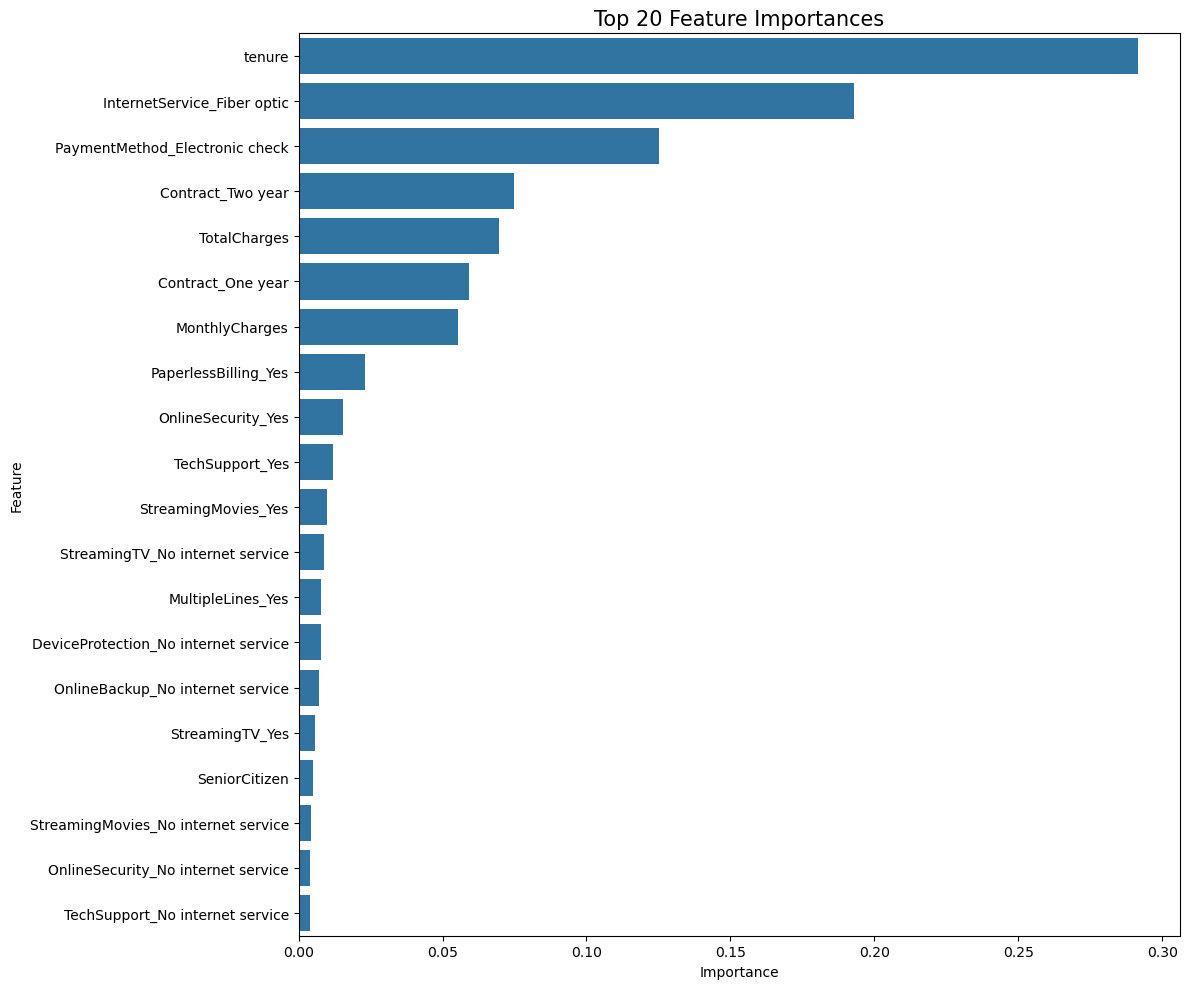


Top 10 most important features:
                           Feature  Importance
1                           tenure    0.291531
10     InternetService_Fiber optic    0.192732
28  PaymentMethod_Electronic check    0.125032
25               Contract_Two year    0.074660
3                     TotalCharges    0.069754
24               Contract_One year    0.059233
2                   MonthlyCharges    0.055417
26            PaperlessBilling_Yes    0.023136
13              OnlineSecurity_Yes    0.015338
19                 TechSupport_Yes    0.011876

CUSTOMER RETENTION PLAN

Key Insights from Data Analysis:

1. Contract Type Impact:
   - Month-to-month contracts have 42.7% churn rate
   - One year contracts have 11.3% churn rate
   - Two year contracts have 2.8% churn rate

2. Tenure Impact:
   - 0-12 months tenure: 48.3% churn rate
   - 13-24 months tenure: 29.5% churn rate
   - 25-36 months tenure: 22.0% churn rate
   - 37-48 months tenure: 19.5% churn rate
   - 49-60 months tenure: 15.0% 

In [37]:
# Get the best model from the previous analysis
best_model = results[best_model_name]['pipeline']
print(f"\nAnalyzing feature importance for {best_model_name}...")

# Extract the model from the pipeline
model_step = best_model.named_steps['model']

# Create a function to plot feature importance if available
def plot_feature_importance(model, preprocessor, X):
    if hasattr(model, 'feature_importances_'):
        # Get feature names after preprocessing
        all_feature_names = []
        
        # Get numerical feature names (they stay the same)
        numerical_features = preprocessor.transformers_[0][2]
        all_feature_names.extend(numerical_features)
        
        # Get categorical feature names after one-hot encoding
        categorical_features = preprocessor.transformers_[1][2]
        categorical_transformer = preprocessor.transformers_[1][1]
        onehot_encoder = categorical_transformer.named_steps['onehot']
        
        # Get all categories except the first one (which is dropped)
        for i, col in enumerate(categorical_features):
            # Check that we're not exceeding the length of categories
            if i < len(onehot_encoder.categories_):
                categories = onehot_encoder.categories_[i][1:]
                for category in categories:
                    all_feature_names.append(f"{col}_{category}")
        
        # Get feature importances
        importances = model.feature_importances_
        
        # Create a DataFrame with feature importances
        if len(all_feature_names) >= len(importances):
            feature_importances = pd.DataFrame({
                'Feature': all_feature_names[:len(importances)],
                'Importance': importances
            })
            
            # Sort by importance
            feature_importances = feature_importances.sort_values('Importance', ascending=False)
            
            # Plot top 20 features
            plt.figure(figsize=(12, 10))
            top_features = feature_importances.head(20)
            sns.barplot(x='Importance', y='Feature', data=top_features)
            plt.title('Top 20 Feature Importances', fontsize=15)
            plt.tight_layout()
            plt.savefig('feature_importances.png')
            plt.show()
            
            return feature_importances
    
    print("Model doesn't have feature_importances_ attribute")
    return None

# Plot feature importance if available
feature_importances = plot_feature_importance(model_step, preprocessor, X)

# Display top features if available
if feature_importances is not None:
    print("\nTop 10 most important features:")
    print(feature_importances.head(10))

# Develop customer retention strategies based on analysis
print("\n" + "="*50)
print("CUSTOMER RETENTION PLAN")
print("="*50)

# Key insights from the analysis
print("\nKey Insights from Data Analysis:")

# 1. Contract Type Analysis
contract_churn = df.groupby('Contract')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values(ascending=False)

print("\n1. Contract Type Impact:")
for contract, rate in contract_churn.items():
    print(f"   - {contract} contracts have {rate:.1f}% churn rate")

# 2. Tenure Analysis
tenure_churn = df.groupby('tenure_group')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values(ascending=False)

print("\n2. Tenure Impact:")
for group, rate in tenure_churn.items():
    print(f"   - {group} months tenure: {rate:.1f}% churn rate")

# 3. Internet Service Analysis
internet_churn = df.groupby('InternetService')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values(ascending=False)

print("\n3. Internet Service Impact:")
for service, rate in internet_churn.items():
    print(f"   - {service} service: {rate:.1f}% churn rate")

# 4. Service Protection Analysis
protective_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
print("\n4. Protective Services Impact:")
for service in protective_services:
    if service in df.columns:
        # Internet customers only
        internet_customers = df[df['InternetService'] != 'No']
        
        with_service = internet_customers[internet_customers[service] == 'Yes']
        service_yes_rate = (with_service['Churn'] == 'Yes').mean() * 100
        
        without_service = internet_customers[internet_customers[service] == 'No']
        service_no_rate = (without_service['Churn'] == 'Yes').mean() * 100
        
        print(f"   - {service}: {service_yes_rate:.1f}% churn with service vs {service_no_rate:.1f}% without service")

# 5. Payment Method Impact
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values(ascending=False)

print("\n5. Payment Method Impact:")
for method, rate in payment_churn.items():
    print(f"   - {method}: {rate:.1f}% churn rate")

# Proposed Retention Strategies
print("\nProposed Retention Strategies:")

print("\n1. Contract Strategy:")
print("   - Target month-to-month customers with incentives to switch to annual contracts")
print("   - Offer significant discounts for 2-year commitments")
print("   - Create loyalty rewards that increase with contract length")

print("\n2. Early Tenure Intervention:")
print("   - Implement a new customer onboarding program for the first 12 months")
print("   - Schedule check-in calls at the 3, 6, and 9 month marks")
print("   - Offer special promotions at high-risk churn periods (months 1-3)")

print("\n3. Service Improvement Strategy:")
print("   - Improve fiber optic service reliability to reduce churn")
print("   - Create service quality assurance teams for fiber customers")
print("   - Implement proactive network monitoring and customer communication")

print("\n4. Protection Services Bundle:")
print("   - Create discounted bundles of security and tech support services")
print("   - Offer 3-month free trials of online security and tech support")
print("   - Develop an educational campaign about the value of protection services")

print("\n5. Payment Method Optimization:")
print("   - Incentivize automatic payment methods with small discounts")
print("   - Simplify the electronic check payment process to reduce friction")
print("   - Implement a paperless billing discount program")

print("\nImplementation Timeline:")
print("   - Phase 1 (Month 1-2): Launch contract conversion campaign")
print("   - Phase 2 (Month 2-3): Implement early tenure intervention program")
print("   - Phase 3 (Month 3-4): Roll out protection services bundle")
print("   - Phase 4 (Month 4-5): Optimize payment methods and billing")
print("   - Phase 5 (Month 5-6): Service quality improvement initiative")

print("\nExpected Impact:")
print("   - Reducing month-to-month contract churn by 15% could decrease overall churn by ~8-10%")
print("   - Improving early tenure retention could save ~5% of new customers from churning")
print("   - Increasing adoption of security and tech support could reduce churn by 6-7%")
print("   - Payment method optimization could reduce churn by 2-3%")
print("   - Overall goal: Reduce total churn rate from current level to under 15%")

## DEEP LEARNING MODEL FOR CHURN PREDICTION

In [46]:
#pip install tensorflow


Building a deep learning model for churn prediction...
Processed training data shape: (5634, 30)
Processed testing data shape: (1409, 30)

Deep Learning Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 192 (768.00 B)


Training deep learning model...
Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5829 - auc: 0.6009 - loss: 0.7671 - val_accuracy: 0.7702 - val_auc: 0.8134 - val_loss: 0.4660
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7601 - auc: 0.7991 - loss: 0.4917 - val_accuracy: 0.7986 - val_auc: 0.8197 - val_loss: 0.4418
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7901 - auc: 0.8148 - loss: 0.4543 - val_accuracy: 0.7941 - val_auc: 0.8229 - val_loss: 0.4380
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7887 - auc: 0.8186 - loss: 0.4484 - val_accuracy: 0.7977 - val_auc: 0.8250 - val_loss: 0.4371
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7884 - auc: 0.8317 - loss: 0.4334 - val_accuracy: 0.7915 - val_auc: 0.8258 - val_loss: 0.4377
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7884 - auc: 0.8307 - loss: 0.4319 - val_accuracy: 0.7986 - val_auc: 0.8266 - val_loss: 0.4358
Epoch 

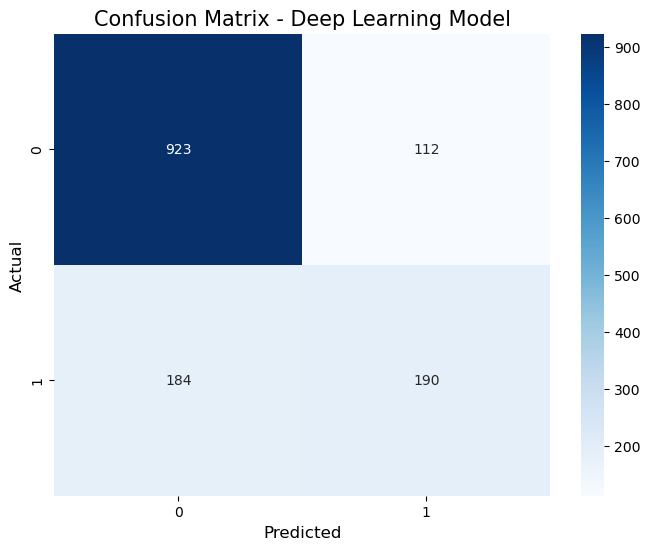

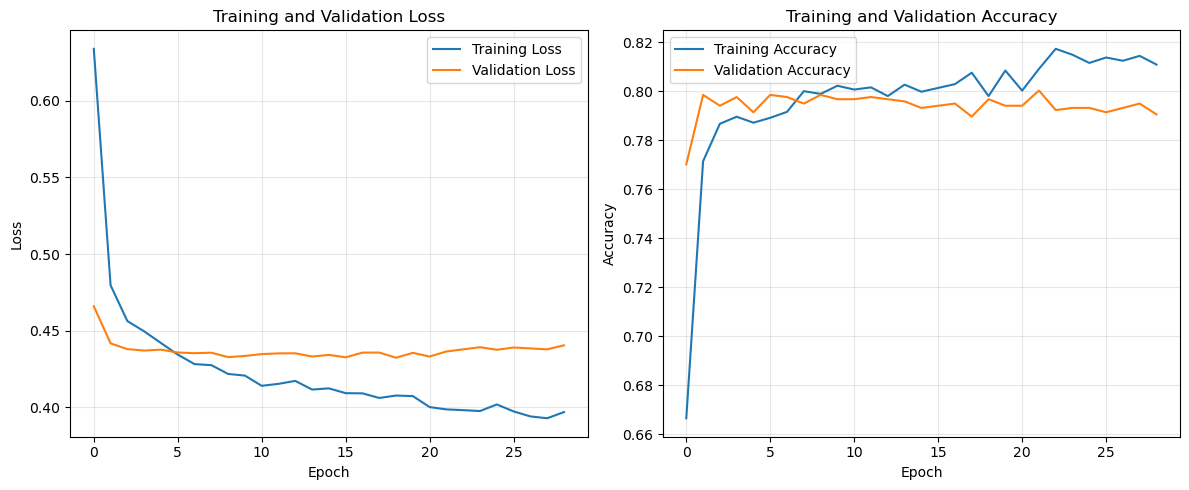

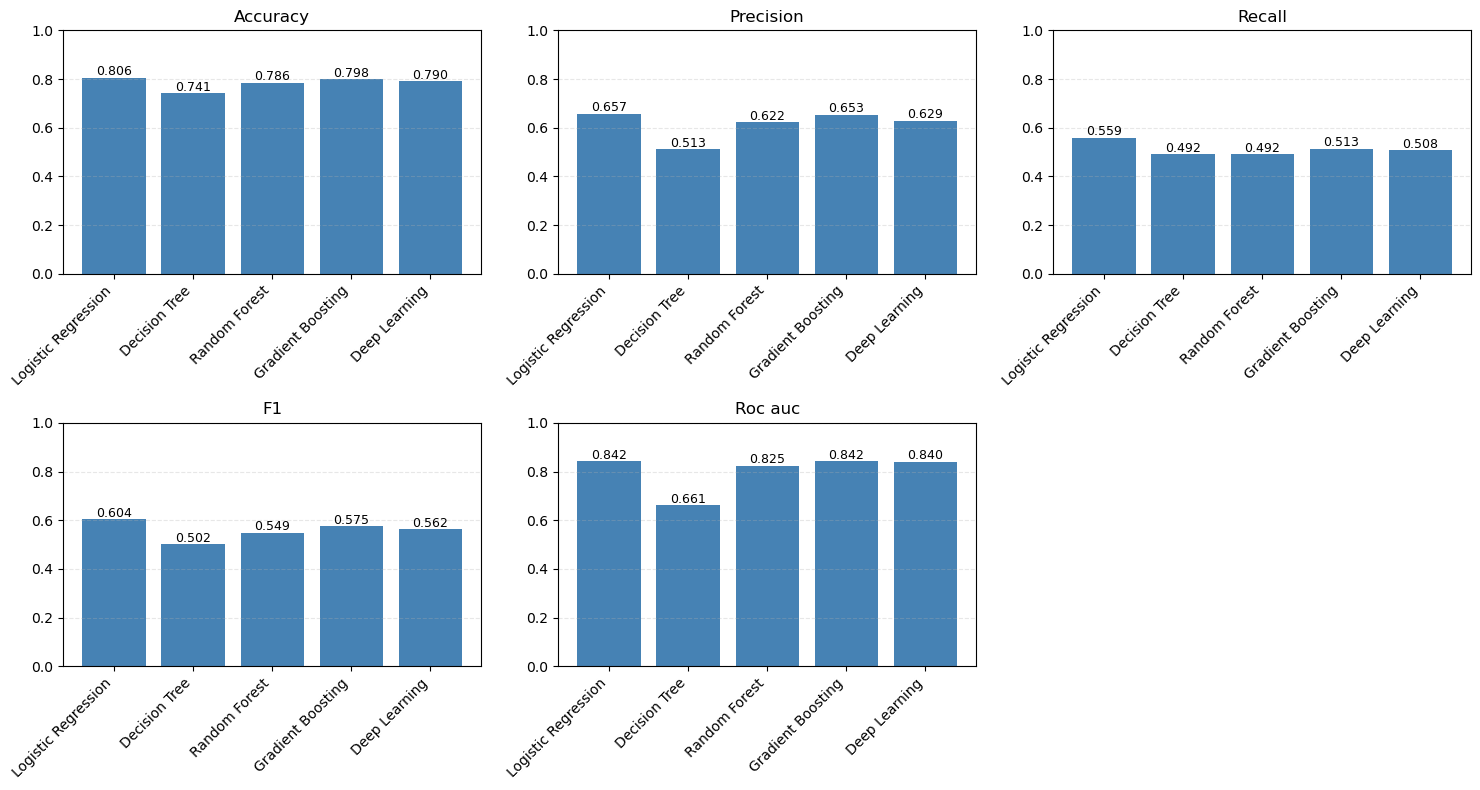

In [47]:
# Import deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

print("\nBuilding a deep learning model for churn prediction...")

# Set random seed for reproducibility
tf.random.set_seed(42)

# Ensure we're using the processed data from previous chunks
# X_train, X_test, y_train, y_test should already be defined
# preprocessor should already be fitted

# Apply the preprocessor to get numerical data for deep learning
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed testing data shape: {X_test_processed.shape}")

# Get input shape for the model
input_shape = X_train_processed.shape[1]

# Build the deep learning model
model = keras.Sequential([
    # Input layer
    layers.Input(shape=(input_shape,)),
    
    # First hidden layer
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    # Second hidden layer
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    # Output layer - binary classification
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Print model summary
print("\nDeep Learning Model Summary:")
model.summary()

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model
print("\nTraining deep learning model...")
history = model.fit(
    X_train_processed, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on test data
print("\nEvaluating deep learning model on test data...")
test_loss, test_accuracy, test_auc = model.evaluate(X_test_processed, y_test, verbose=0)

print(f"  Test Loss: {test_loss:.4f}")
print(f"  Test Accuracy: {test_accuracy:.4f}")
print(f"  Test ROC AUC: {test_auc:.4f}")

# Make predictions
y_pred_proba_dl = model.predict(X_test_processed, verbose=0)
y_pred_dl = (y_pred_proba_dl > 0.5).astype(int)

# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

precision_dl = precision_score(y_test, y_pred_dl)
recall_dl = recall_score(y_test, y_pred_dl)
f1_dl = f1_score(y_test, y_pred_dl)

print(f"  Precision: {precision_dl:.4f}")
print(f"  Recall: {recall_dl:.4f}")
print(f"  F1 Score: {f1_dl:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dl))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_dl = confusion_matrix(y_test, y_pred_dl)
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Deep Learning Model', fontsize=15)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.savefig('confusion_matrix_dl.png')
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dl_training_history.png')
plt.show()

# Add deep learning model to results for comparison
results['Deep Learning'] = {
    'accuracy': test_accuracy,
    'precision': precision_dl,
    'recall': recall_dl,
    'f1': f1_dl,
    'roc_auc': test_auc
}

# Final comparison of all models including deep learning
all_models = list(results.keys())
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

plt.figure(figsize=(15, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    values = [results[model][metric] for model in all_models]
    bars = plt.bar(all_models, values, color='steelblue')
    
    # Add data labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', fontsize=9)
    
    plt.title(f'{metric.capitalize().replace("_", " ")}')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('all_models_comparison.png')
plt.show()

In [ ]:
# conda create -n tensorflow-env python=3.11
# conda activate tensorflow-env
# pip install tensorflow

In [ ]:
# import sys
# print("Python version:", sys.version)
# print("Python version info:", sys.version_info)

In [ ]:
# pip install tensorflow==2.19.0